# Table of Contents

1. [Problem Understanding](#1)
2. [Data Collection](#2)
3. [Data Understanding](#3)
4. [Data Exploratation](#4)
    - [Library Import](#4.1)
    - [Data Import](#4.2)
    - [Check the shape](#4.3)
    - [Check the structure](#4.4)
    - [Check the head](#4.5)
    - [Check the summary statistics](#4.6)
    - [Check the distribution](#4.7)
5. [Data Analysis](#5)
    - [Data Visualization](#5.1)
    - [Categorical Data](#5.2)
    - [Univariate Analysis](#5.3)
    - [Outliers](#5.4)
    - [Bivariate Analysis](#5.5)
6. [Feature Selection](#6)
    - [New Features](#6.1)
    - [Data Split](#6.2)
    - [Resampling](#6.3)
7. [Pipeline Building](#7)
8. [Model Building](#8)
    - [Create a printing results function](#8.1)
    - [Logistic Regression](#8.2)
    - [Random Forest](#8.3)
    - [XGBoost](#8.4)



<a id="1"></a>
# Problem Understanding

## Business Problem

With about 158 million paying members in 178 countries, Spotify is the global leader in the streaming music sector. Spotify makes APIs available for obtaining data from its music track catalog. Spotify music datasets have become one of the most prominent datasets in the data science field for learning predictive modeling.

## Questions
1. What interesting insights can we generate from this dataset?
2. How to visualize trends in this dataset?
3. Who are the most popular artists?
4. What types of machine learning models perform well on this dataset?
5. What features most clearly distinguish a popular song?

<a id="2"></a>
# Data Collection

## Data Source

Spotify dataset from Kaggle.

Link: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets

<a id="3"></a>
# Data Understanding

## Data Description

This dataset provides audio information for almost 600,000 Spotify tracks. The data is divided into around 20 columns, each of which describes the track and its characteristics.

## Data Shape

~600,000 observations and 20 features.

## Data Dictionary

There are 20 columns in this dataset and their description are as follows.
* id: unique identifier for each track used by Spotify (randomly generated alphanumeric string)
* name: track name
* popularity: song popularity score as of March 2021 on a normalized scale [0-100] where 100 is the most popular
* duration_ms: duration of track in milliseconds
* explicit: true or false if the song contains explicit content.
* artists: name of the main artist
* id_artists: unique identifier for each artist used by Spotify
* release_date: when the album was released (date format: yyyy/mm/dd)
* danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is set to -1.
* loudness: The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.
* mode: Mode indicates the modality (major=1 or minor=0) of a track, the type of scale from which its melodic content is derived.
* speechiness: measures from 0.0 to 1.0 and detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* acousticness: confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* instrumentalness: measure from 0.0 to 1.0 and represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* liveness: likelihood measure from 0.0 to 1.0 and indicates the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* tempo: The overall estimated tempo of a track in beats per minute (BPM)
* time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

<a id="4"></a>
# Data Exploration

<a id = "4.1"></a>
## Library Import

In [ ]:
# Data Collection, Data Cleaning & Data Manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainbale AI (XAI)
# !pip install lime
# import lime.lime_tabular
# !pip install shap
# import shap

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score


<a id = "4.2"></a>
## Data Import

In [ ]:
df = pd.read_csv('Spotify-Datasets/tracks.csv', header = 0)

<a id="4.3"></a>
## Check the shape

In [ ]:
df.shape

(586672, 20)

* We see that our dataset has nearly 600,000 observations and 20 features.

<a id="4.4"></a>
## Check the structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

* From the structure above, we can see that there are 9 features with floating values, 6 features with integer values, and 5 features with categorical data.

* In total, we have 15 numerical features and 5 categorical features.

* We also see that the 'name' feature is missing some values. Since the 'name' feature is unique and the number of missing values is small, we can remove those missing values later.

<a id="4.5"></a>
## Check the head

In [ ]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


* We can see that id and id_artist are very uniquely defined by the Spotify company, so we can drop them later as we cannot use them for our Machine Learning models.

* The release_date has incosistent data, for example, 1922-03-21 and 1922. So we need to format them later.

* The duration_ms has a large range of value, up to nearly 300,000, while other features have small range of value. We need to scale them later to make sure that our Machine Learning models work correclty.

* The loudness has negative values so we need to scale them too.


<a id="4.6"></a>
## Check the summary statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


We can see that:

* The popularity column has a minimum of 0, a maximum of 100 and an average of 27, which means that most songs are unpopular and the popularity data is skewed to the left.

* The explicit column has a minimum of 0, a maximum of 1 and an average of 0.04, which means that most of the songs are not clear and the data is clearly skewed to the left.

* The duration_ms has a large range of value, up to nearly 300,000, while other features have small range of value. We need to scale them later to make sure that our Machine Learning models work correclty.

* The loudness has negative values so we need to scale them too.

* The data of speechiness, instrumentalness, liveness are skewed to the left.

<a id="4.7"></a>
## Check the distribution

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

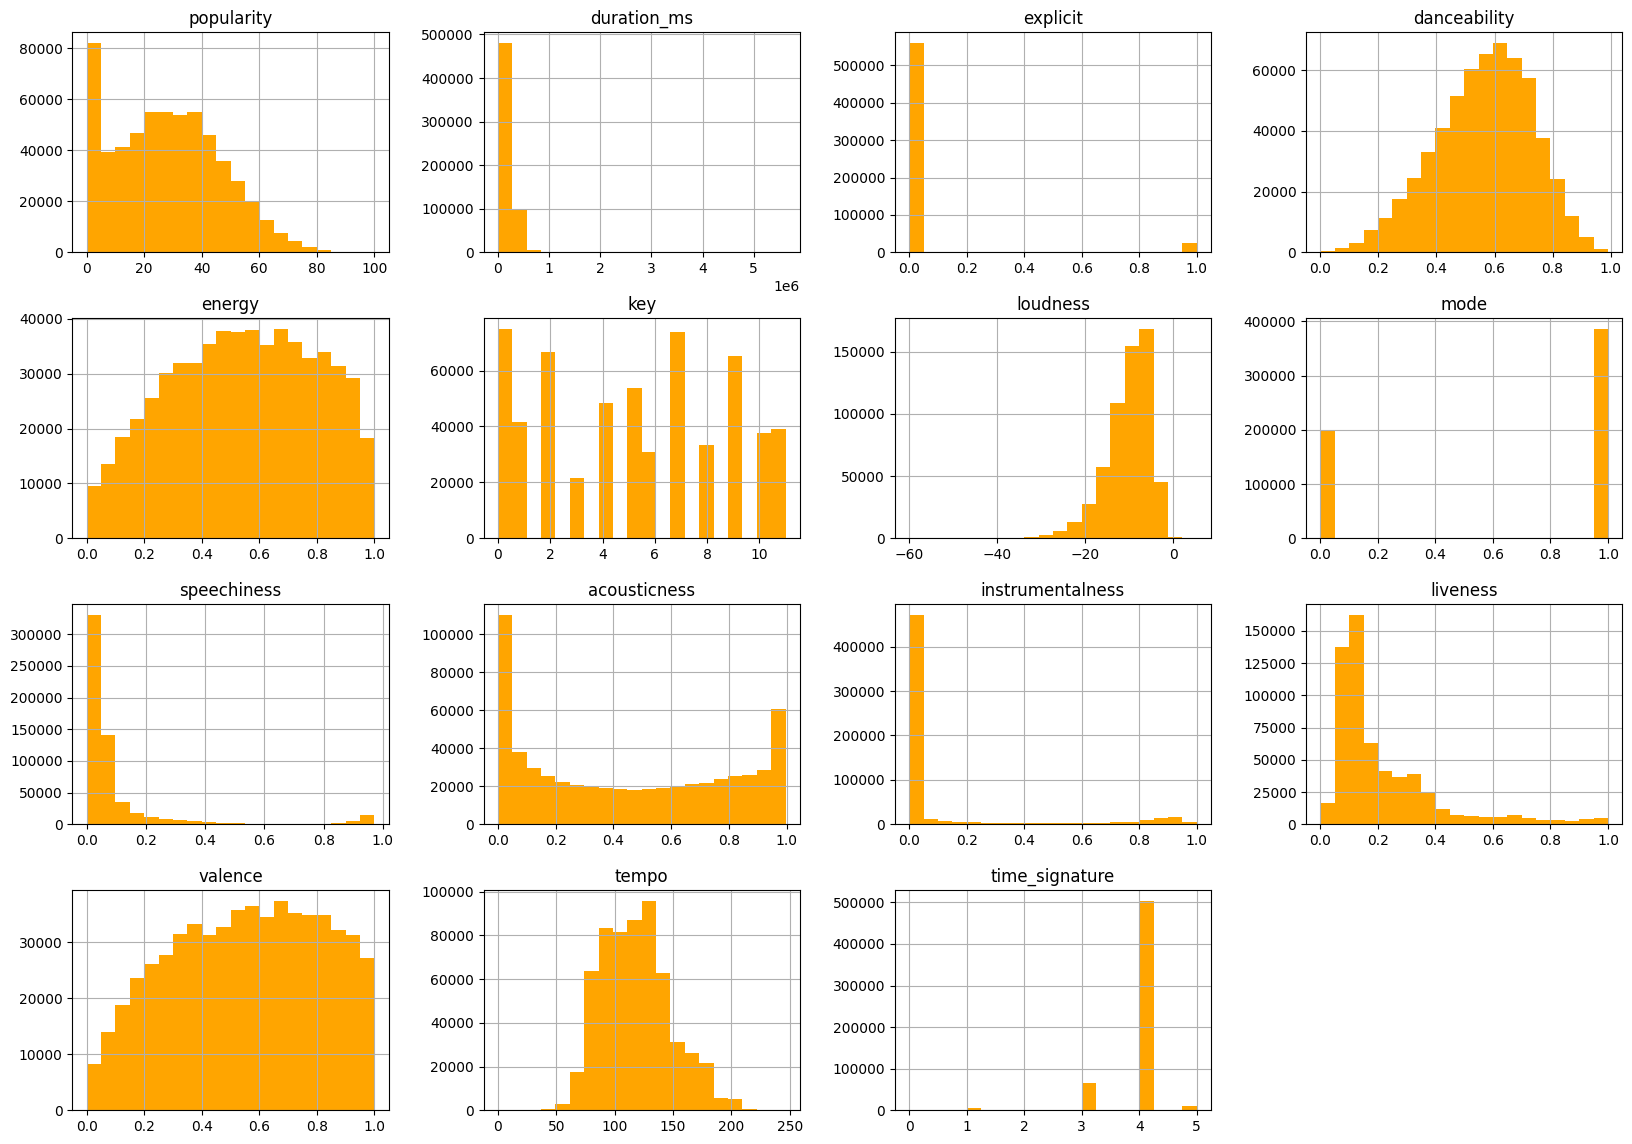

In [ ]:
df.hist(bins = 20, color = 'orange', figsize = (20, 14))

<a id="5"></a>
# Data Analysis

<a id="5.1"></a>
## Data Visualization

<a id = 'Categorical_Data'></a>
## Categorical Data

### Find the categorical variables

In [ ]:
categorical_df = df.select_dtypes(include = 'object')

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586672 non-null  object
 1   name          586601 non-null  object
 2   artists       586672 non-null  object
 3   id_artists    586672 non-null  object
 4   release_date  586672 non-null  object
dtypes: object(5)
memory usage: 22.4+ MB


* We have 5 categorical variables here: id, name, artists, id_artists and release_date

### Check cardinality

In [ ]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

id: 586672


name: 446474


artists: 114030


id_artists: 115062


release_date: 19700




* We can see that there are around 115,000 artists in the dataset.

### Find the most popular artists

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20, 14))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<Figure size 2000x1400 with 0 Axes>

In [ ]:
lead_artists = df['artists'].value_counts().head(20)

lead_artists

['Die drei ???']                              3856
['TKKG Retro-Archiv']                         2006
['Benjamin Blümchen']                         1503
['Bibi Blocksberg']                           1472
['Lata Mangeshkar']                           1373
['Bibi und Tina']                              927
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     905
['Francisco Canaro']                           891
['Ella Fitzgerald']                            870
['Tadeusz Dolega Mostowicz']                   838
['Fünf Freunde']                               812
['Mohammed Rafi']                              787
['Queen']                                      777
['Frank Sinatra']                              680
['Elvis Presley']                              680
['The Rolling Stones']                         654
['Die Originale']                              638
['Billie Holiday']                             609
['Julio Iglesias']                             595
['Globi']                      

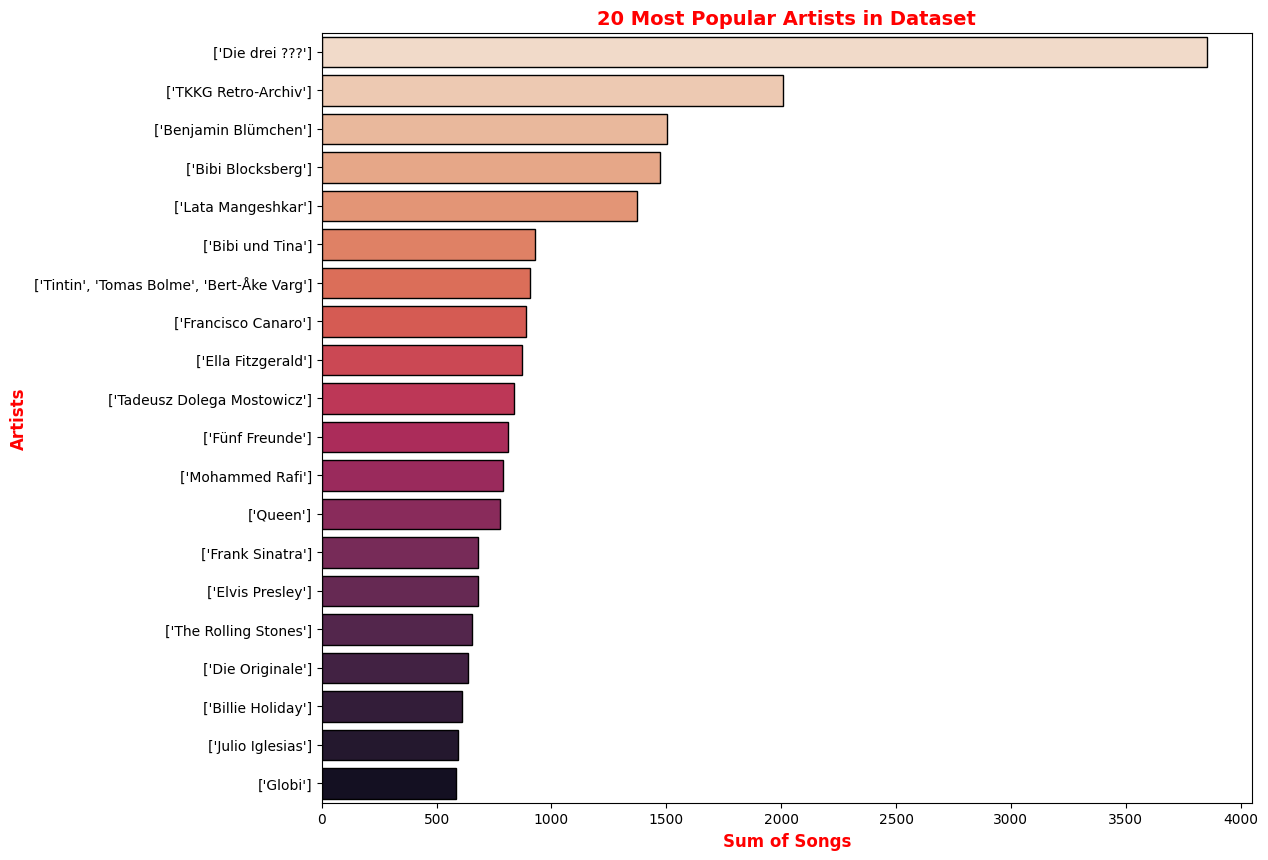

In [ ]:
fig, ax = plt.subplots(figsize = (12, 10))

ax = sns.barplot(x = lead_artists.values, y = lead_artists.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black', ax = ax)

ax.set_xlabel('Sum of Songs', c ='r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists', c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Artists in Dataset', c = 'r', fontsize = 14, weight = 'bold')

plt.show()

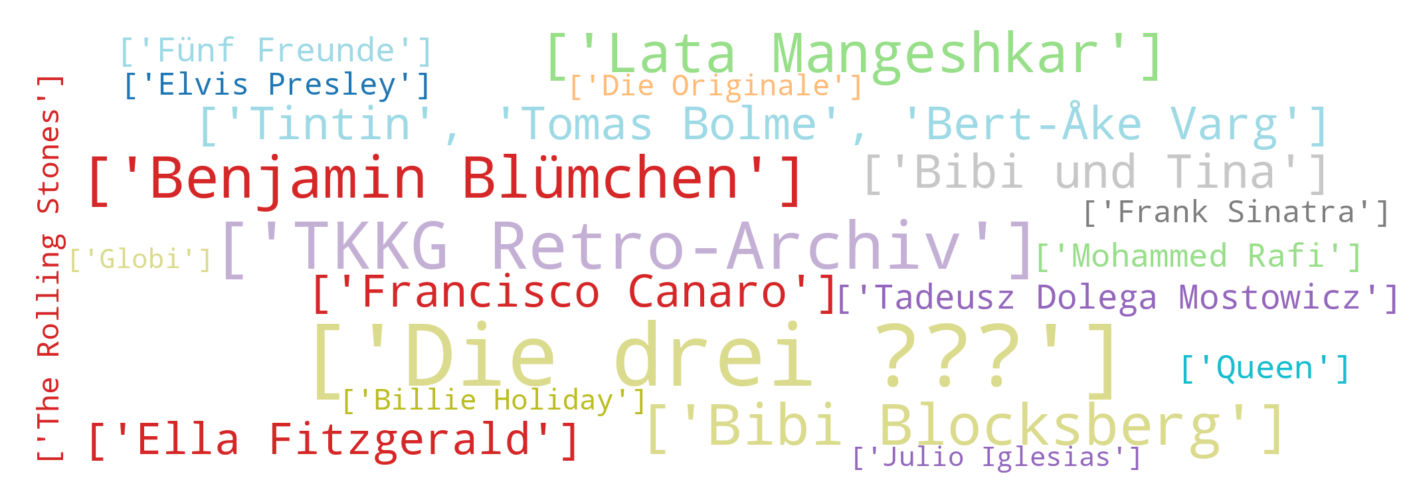

In [ ]:
visualize_word_counts(lead_artists)

* Based on the visualization, we can see that some most popular artists are Die Drei, Benjamin Blumchen, TKKG Retro-Archiv,...

### Datetime Data

### Convert the column 'release_date' to datetime datatype in Python

In [ ]:
import datetime

In [ ]:
df.release_date = pd.to_datetime(df.release_date)

In [ ]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### Find the first date in the dataset

In [ ]:
df.release_date.min()

Timestamp('1900-01-01 00:00:00')

### Find the last date in the dataset

In [ ]:
df.release_date.max()

Timestamp('2021-04-16 00:00:00')

* We can see that the songs of Spotify has a large range of dates from 1900-01-01 to 2021-04-16.

### Find the number of songs per year

In [ ]:
df["year"] = df["release_date"].dt.year

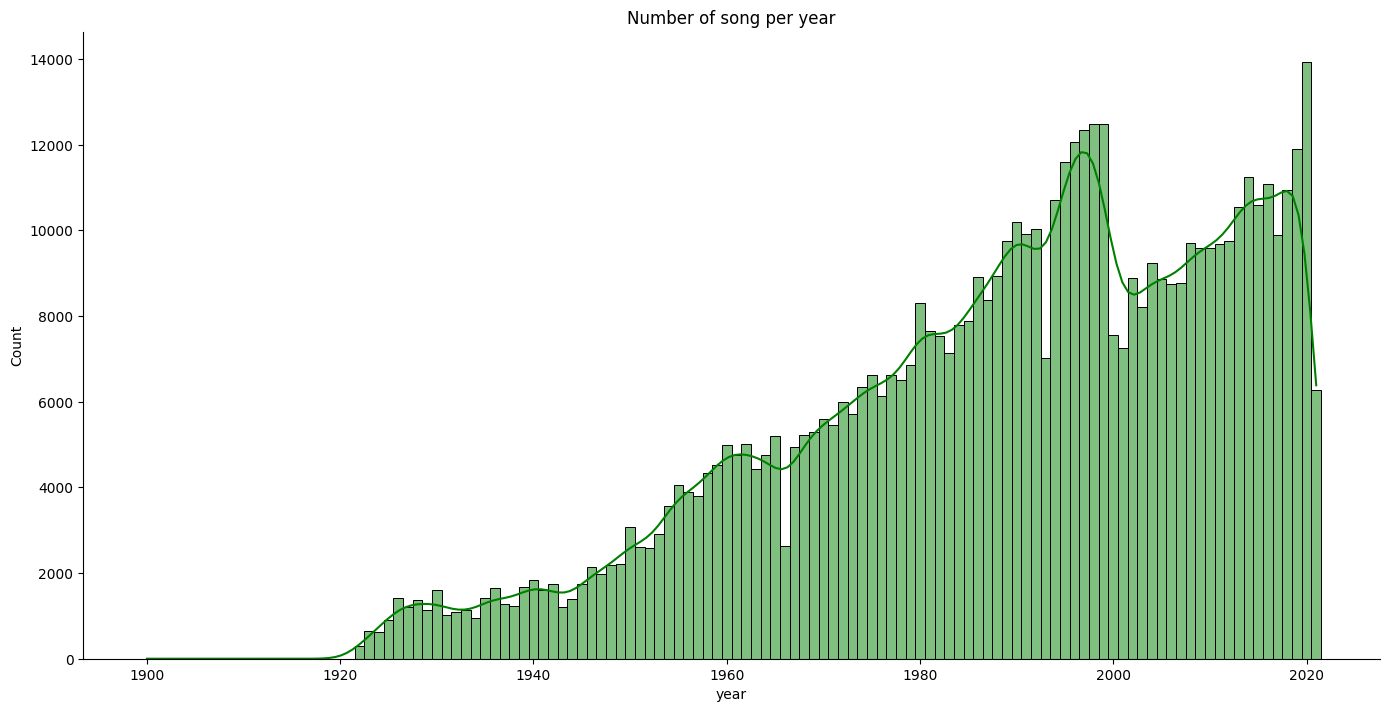

In [ ]:
sns.displot(df["year"], discrete = True, aspect = 2, height = 7, kind = "hist", kde = True, color = 'green').set(title="Number of song per year")

* We can see that the number of musical compositions each year increases gradually.

* However, starting in 2001, there was a huge decrease in the number of songs written. 2001 was the year that the US world trade center was attacked by terrorists. Perhaps this is the reason why musicians aren't excited about composing anymore.

* After that, the number of works increased gradually, but by 2020 there was a decrease. This is the year Covid-19 appeared, everyone was isolated, so music activities decreased.

### Find the most popular songs on Spotify

In [ ]:
most_popularity = df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)

most_popularity.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,...,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,...,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,2019
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,...,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,2020


In [ ]:
lead_songs = most_popularity[['name', 'popularity']].head(20)

lead_songs

,name,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),100
93803,drivers license,99
93804,Astronaut In The Ocean,98
92810,Save Your Tears,97
92811,telepatía,97
92813,Blinding Lights,96
93805,Leave The Door Open,96
92814,The Business,95
91866,Streets,94
92816,Heartbreak Anniversary,94


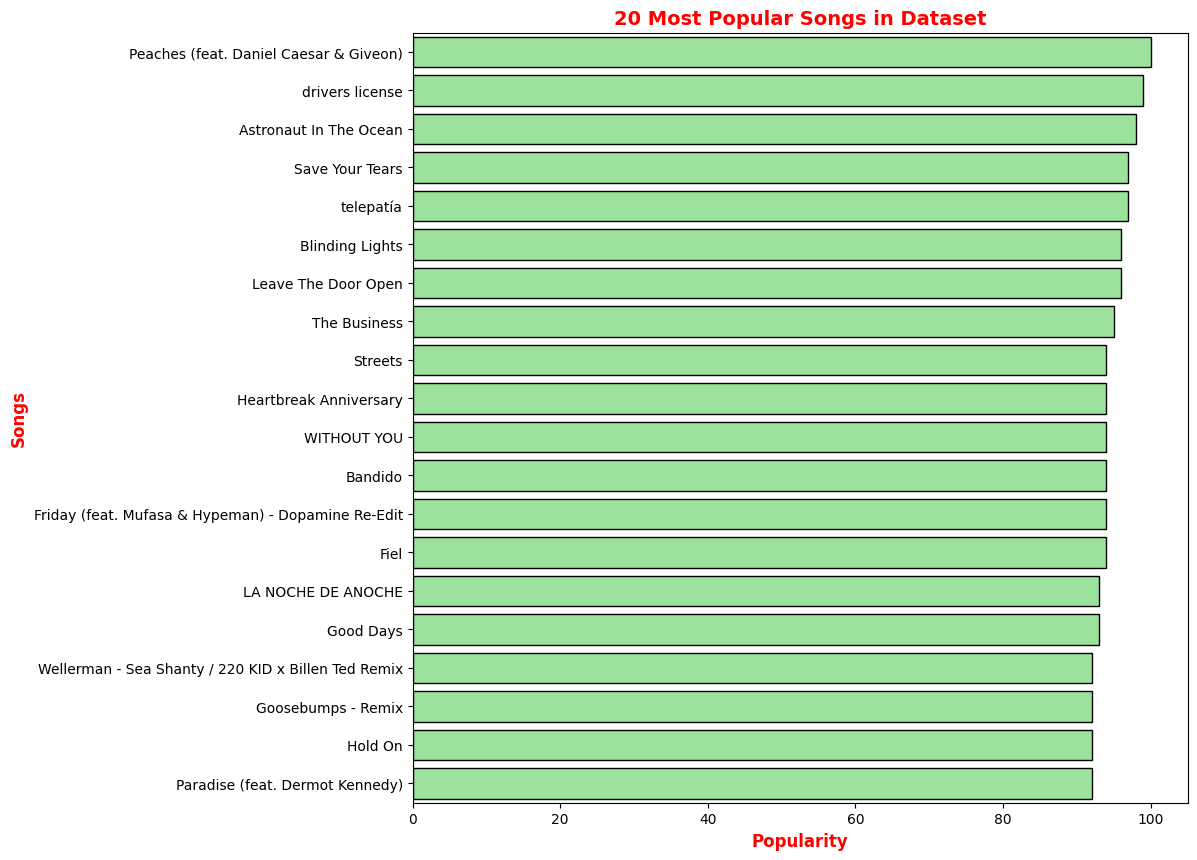

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(x = lead_songs.popularity, y = lead_songs.name, color = 'lightgreen', orient = 'h', edgecolor = 'black', ax = ax)

ax.set_xlabel('Popularity', c ='red', fontsize = 12, weight = 'bold')
ax.set_ylabel('Songs', c = 'red', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Songs in Dataset', c = 'red', fontsize = 14, weight = 'bold')

plt.show()

In [ ]:
from sklearn import preprocessing

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(df[feat_cols].mean(), ignore_index=True)

print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

<ipython-input-26-19c706bbd80d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
<ipython-input-26-19c706bbd80d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_vals = mean_vals.append(df[feat_cols].mean(), ignore_index=True)


   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.705892  0.652081     0.099778      0.239731          0.002109   
1      0.563594  0.542036     0.104864      0.449863          0.113451   

   liveness   valence  
0  0.195157  0.527300  
1  0.213935  0.552292  


### Find the most danceable songs

In [ ]:
most_danceable = df.sort_values(by='danceability',ascending=False).head(10)

most_danceable

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
418558,4tq7Q9bTkLqzXNUi8PVmk2,Puisorul cafeniu,15,84707,0,['Malina Olinescu'],['6KZH1ER38F5smKpXKmLRwb'],2002-01-01,0.991,0.422,...,-11.093,1,0.2470,0.307000,0.017600,0.0788,0.994,119.975,4,2002
156664,5ObMLQkrprMky3fuOCnFmW,Who Loves The Sun feat. Jo.Ke - Edit,53,256996,0,"['Nu', 'Jo.Ke']","['5tY2sa8I11tpMuhU9onQ6e', '0RKP3F2s1SHvGpckHu...",2011-07-12,0.988,0.644,...,-10.245,0,0.0720,0.118000,0.462000,0.2440,0.499,120.003,4,2011
252256,7yCtSls77Pnz8R4etGfHe5,Tío Mario,11,101760,0,['Susana Bosch'],['7FSDwf9FSxPM0TnnbuBRUi'],1998-07-01,0.988,0.459,...,-6.631,1,0.1300,0.124000,0.000000,0.0749,0.930,114.849,4,1998
62569,5YIF6HSOtHN9HdcE5IPzMe,Funky Cold Medina,58,248160,0,['Tone-Loc'],['5Y8EphH8Vdqu5SLj6K5vjj'],1989-01-01,0.988,0.633,...,-15.012,0,0.0888,0.075500,0.000002,0.0668,0.929,117.493,4,1989
356102,5GFwJHucflHj46Hwet6qvc,Cool - Leonardo La Mark Remix,0,361967,0,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...","['69Jnii2nKzGXwTz2CNR82H', '5McLuoTfnILw7AYs1I...",2021-01-15,0.987,0.649,...,-6.727,1,0.2770,0.000626,0.379000,0.0686,0.458,122.002,4,2021
74928,6G7Gtq7ymFvYuqcJSAW9cA,New Year (2021),0,42250,0,"['xxrichbeats', 'Egor4ik']","['49FLHDHX5mD9Pbm6JwLujJ', '01KisSmrh9sNoIzqT6...",2021-01-20,0.987,0.293,...,-11.453,0,0.1990,0.003210,0.000010,0.1280,0.502,119.974,4,2021
175899,1HTN2lX8X87qmMXTtI9FDL,Go Girl,54,229669,1,"['Pitbull', 'Trina', 'Young Bo']","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-29,0.986,0.597,...,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4,2012
509977,3jjfgpQ05jy0hoGwdaVmzH,BABÁM,40,194076,0,"['Horváth Tamás', 'Pixa']","['4I1y8Rd0H2NGXMzmT6JWsz', '6YbKlFrkjKLYpC3PYy...",2020-06-10,0.986,0.323,...,-6.965,0,0.1070,0.018900,0.000284,0.0857,0.708,121.958,4,2020
303940,1MgM0WDaoQ2A3bnIQTR6ty,Go Girl,55,229669,1,"['Pitbull', 'Trina', 'Young Bo']","['0TnOYISbd1XYRBk9myaseg', '4PrinKSrmILmo0kERG...",2012-05-08,0.986,0.597,...,-6.809,1,0.3080,0.145000,0.000002,0.1970,0.761,115.004,4,2012
56990,1JLU51CdgQhWWWokxrbOPM,Como uma onda - Zen-surfismo,45,201400,0,['Lulu Santos'],['0A1oy7PC7fdzURgaLaWkL1'],1983-10-20,0.985,0.379,...,-11.910,0,0.1080,0.161000,0.895000,0.0983,0.889,116.477,4,1983


### Find songs with the most energy

* Energy is a number between 0.0 and 1.0 that indicates a perceptual measurement of intensity and activity. Typically, energetic songs are loud, quick, and chaotic. For example, death metal has a high energy level, but a Bach prelude has a low score. This property is influenced by the perceptions of dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [ ]:
most_energy = df.sort_values(by='energy',ascending=False).head(10)

most_energy

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
500552,0dDvEjTmTa1n2X7shN3gE0,Aua im Kopf (Morgen sind wir schlauer...),51,205251,0,['Tobee'],['5HvFk00KrkDIPJuzSLFd0r'],2016-05-06,0.736,1.0,...,-1.820,0,0.1280,0.055900,0.000,0.3540,0.79100,144.060,4,2016
304596,0X0pjY5flDn184H8zBrWC6,Numb The Pain (Mix Cut) - Original Mix,4,76520,0,['Will Atkinson'],['5FXLHhKgStv36wfwXMhTWt'],2015-12-18,0.501,1.0,...,-5.767,1,0.0558,0.000027,0.937,0.2990,0.39500,138.027,4,2015
512717,3sxaFKJ1rIH8mDBDrikuMH,Suno Suno Tumhen Sunaye,0,163154,0,['K Dutta'],['2sOPDx3ICYZJspPHFZNysM'],1944-12-31,0.000,1.0,...,-4.363,1,0.0000,0.202000,0.999,0.6470,0.00000,0.000,0,1944
85573,6sjzQ7DdzJT0eiW7Hvjz3N,Amnesia (Mix Cut) - SoundLift’s Emotional Take,8,56467,0,"['Running Man', 'SoundLift']","['0NVmPu7KrbwzvDO2jQ2OZe', '145cCavsIQpMOK4Nk7...",2012-12-20,0.395,1.0,...,-4.649,0,0.0806,0.000003,0.980,0.4550,0.68400,136.003,4,2012
303776,2SLRXchrQ1J2Sz9F6vAPVg,Amnesia (Mix Cut) - SoundLift’s Emotional Take,4,56467,0,"['Running Man', 'SoundLift']","['0NVmPu7KrbwzvDO2jQ2OZe', '145cCavsIQpMOK4Nk7...",2012-12-20,0.395,1.0,...,-4.649,0,0.0806,0.000003,0.980,0.4550,0.68400,136.003,4,2012
172151,0DRPoahb98of6Zw2y6eCIV,Château D'amour,28,198667,0,['La Cream'],['1042GWtxzEb5XrVoUJkiXc'],1999-01-01,0.718,1.0,...,-7.112,0,0.0516,0.062900,0.822,0.3060,0.24200,134.975,4,1999
380594,0PPzIdQKzEPjVBiYGYIgyQ,Napalm Poet [Mix Cut] - Original Mix,1,69573,0,['Adam Ellis'],['5tGHR2wsaFZhRzRPRZDFds'],2013-12-20,0.404,1.0,...,-5.992,1,0.1030,0.000013,0.889,0.3600,0.29100,138.000,4,2013
286031,2k6kAGS7l3o5F5AQnBSbnk,"White Noise Rain(Loopable,No fade)",56,149243,0,"['Rain Sounds', 'Sleep Sounds of Nature', 'Zen...","['5nSGBmlgUdqWNExnOX8VtV', '59FRAcMcsHQupc8lup...",2017-04-07,0.209,1.0,...,-14.085,0,0.0684,0.116000,0.731,0.6360,0.00001,84.715,4,2017
184042,5mVAJvDffn82Gp8CYiOOYf,Lush Rain,15,128174,0,['Nataural'],['2RtpJcuwdwhbbs2b0lQh8f'],1994-05-20,0.152,1.0,...,-13.321,0,0.0600,0.141000,0.970,0.9390,0.00001,134.447,3,1994
378102,2rxmKecLx6jH3INIaBOKVr,Ochtendgymnastiek,45,235160,0,['Samson & Gert'],['2q3tx3ThgAhkMoUYiEnIjy'],1997-01-01,0.745,1.0,...,-6.210,0,0.0466,0.060000,0.246,0.0994,0.58100,140.009,4,1997


### Find songs more likely to create positive feelings

* A value between 0.0 and 1.0 that describes the melodic upbeatness of a track. High-valence songs sound more positive (e.g., pleasant, cheery, euphoric), whereas low-valence tracks sound more negative (e.g. sad, depressed, angry).

In [ ]:
most_valence = df.sort_values(by='valence',ascending=False).head(10)

most_valence

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
397802,7e3bLyrHNCBH3HnHDpca5a,La carezza della mamma,35,110139,0,['Matteo Bosi'],['0TrrnSs0g46uyEEnvqLv23'],2011-07-01,0.713,0.516,...,-12.752,1,0.0639,0.9960,0.946000,0.0404,1.0,135.067,3,2011
322093,0Tz023PcPX4JsVFtOCU5o4,Lausavisur,11,74027,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.940,0.328,...,-11.092,1,0.1920,0.6510,0.993000,0.0565,1.0,120.126,4,2008
322002,3hd9GXM0Ahb3wsyETmATPZ,Loan Er Komin,18,71947,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.838,0.442,...,-9.052,1,0.3050,0.8950,0.050900,0.0721,1.0,110.111,4,2008
288680,4czwRicqbT6JES6kIg7KUE,Ο ύμνος του ΠΑΝΑΘΗΝΑΪΚΟΥ,7,113000,0,['Λάκης Γαβαλάς'],['6Ga2m0HBbLE05XTUEpAVVt'],1978-01-01,0.956,0.519,...,-11.044,1,0.0588,0.6020,0.000036,0.1040,1.0,133.180,4,1978
236547,3rHsX3TLPYixr7eGzRlZqI,Pasito Duranguense,51,200213,0,['Montez de Durango'],['1i4xi4ramy5BPYr2Bhf6sc'],2002-01-04,0.912,0.824,...,-5.163,1,0.0831,0.0776,0.541000,0.0260,1.0,144.925,4,2002
322056,5B9796p9CkG9BMDhgFZ3Rk,Alfareidin ( Stod Eg Ut I ),13,153120,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.774,0.454,...,-9.386,1,0.1120,0.6910,0.957000,0.0823,1.0,100.111,4,2008
11955,53nhbx7yp4TJEpmMBCLWPQ,Chatter,0,19200,0,['Raymond Scott'],['31DffUzogcRBJT3Andaqtt'],1937-01-01,0.768,0.317,...,-12.017,0,0.8640,0.9330,0.224000,0.5720,1.0,119.254,4,1937
206971,6NcXXqOUOTrqoJvzzFNNB3,Noches Vacias,33,232000,0,['Karolina'],['5UCcU04GZsZJY2g2qmisNp'],1992-01-01,0.753,0.524,...,-15.816,1,0.0531,0.4480,0.475000,0.0399,1.0,105.861,4,1992
322066,6SHlkNPxTA1ZlVVuAW74dY,Voluvisa,13,146000,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.849,0.421,...,-11.378,0,0.1240,0.8850,0.847000,0.1120,1.0,110.037,4,2008
322102,47XYOIV7xMlGQ7sfkfw1X8,Glettinn Maninn,11,71813,0,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.860,0.406,...,-11.792,1,0.1330,0.9210,0.241000,0.2470,1.0,110.041,4,2008


<a id = '5.3'></a>
## Univariate Analysis

### Summary statistics

In [ ]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,1988.566168
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,22.831283
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,1974.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,1992.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,2007.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000


### Distribution

#### Histograms

In [ ]:
num_df = df.select_dtypes(include = 'number')

<ipython-input-32-220806b66f93>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



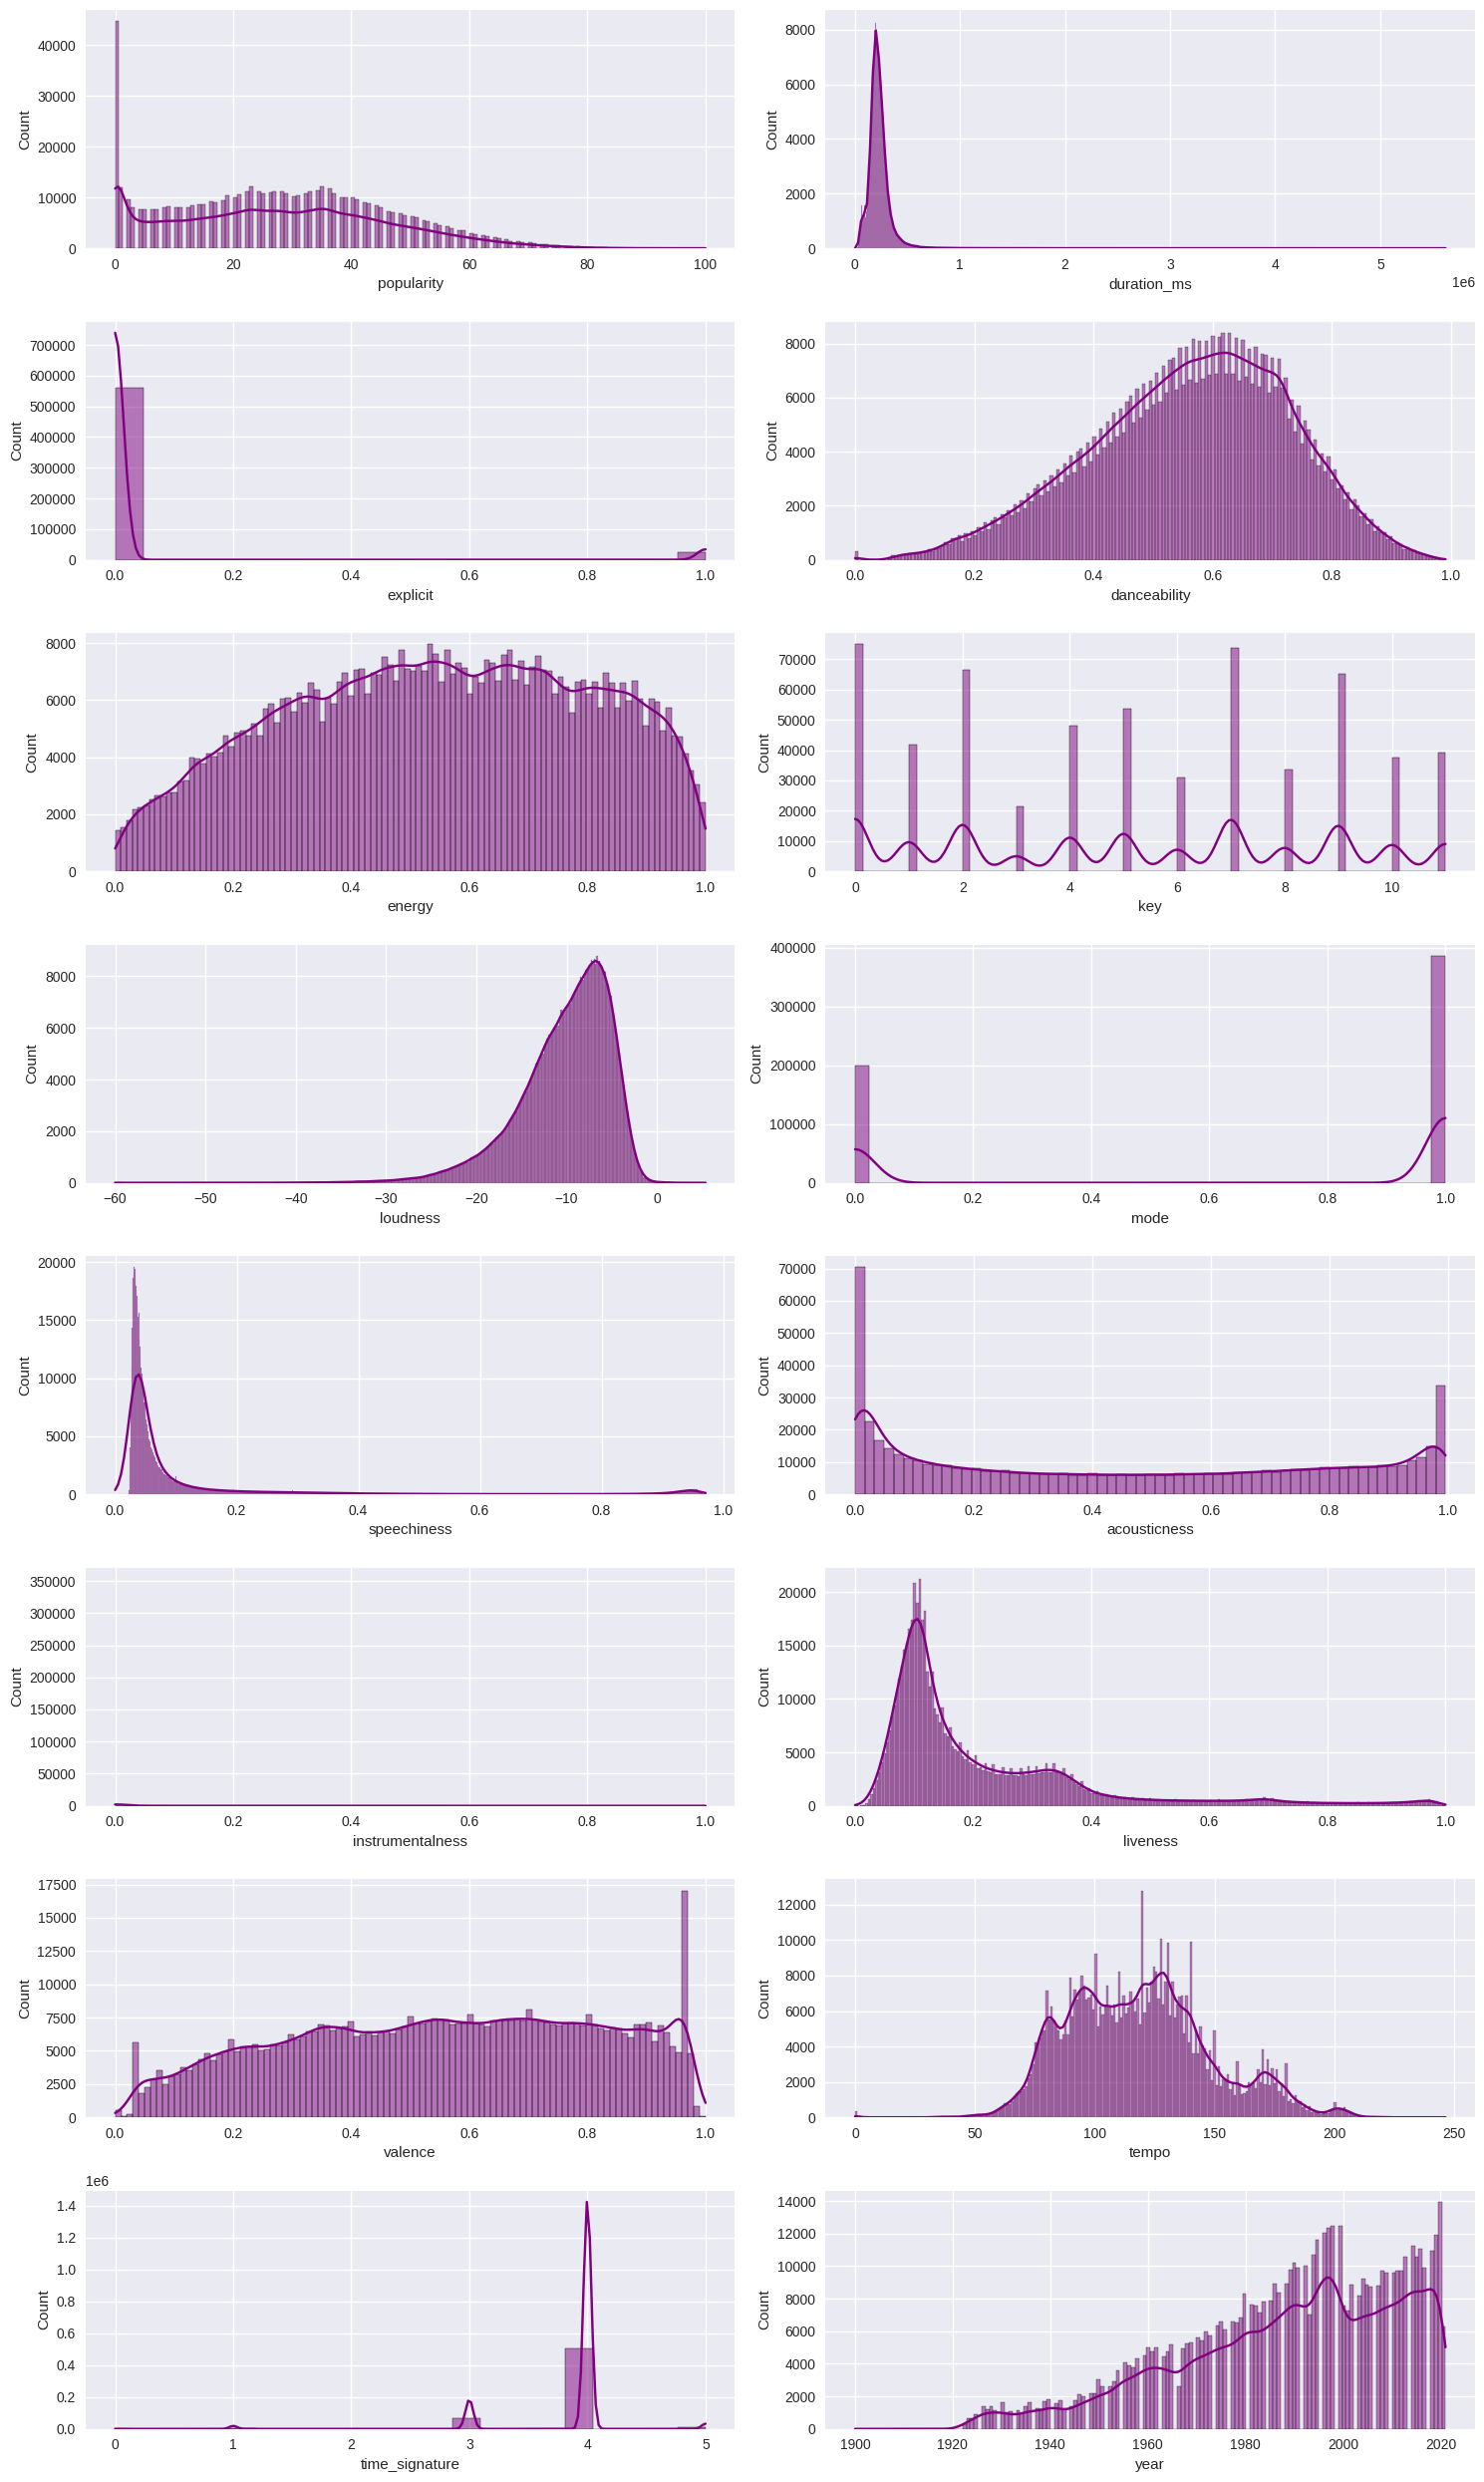

In [ ]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(x=df[name], kde = True, ax=axes[i, j], color = 'purple')
    y = y + 1

plt.tight_layout()
plt.show()

* We can see that popularity, duration, explicit, speechiness, Instrumentalness, liveness are skewed right.

* loudness, mode, time_signature are skewed left.

* Only danceability, energy, valence, tempo have normal distribution.

* Before we can use the machine learning models, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.

#### Boxplots

<ipython-input-33-151741af7edd>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



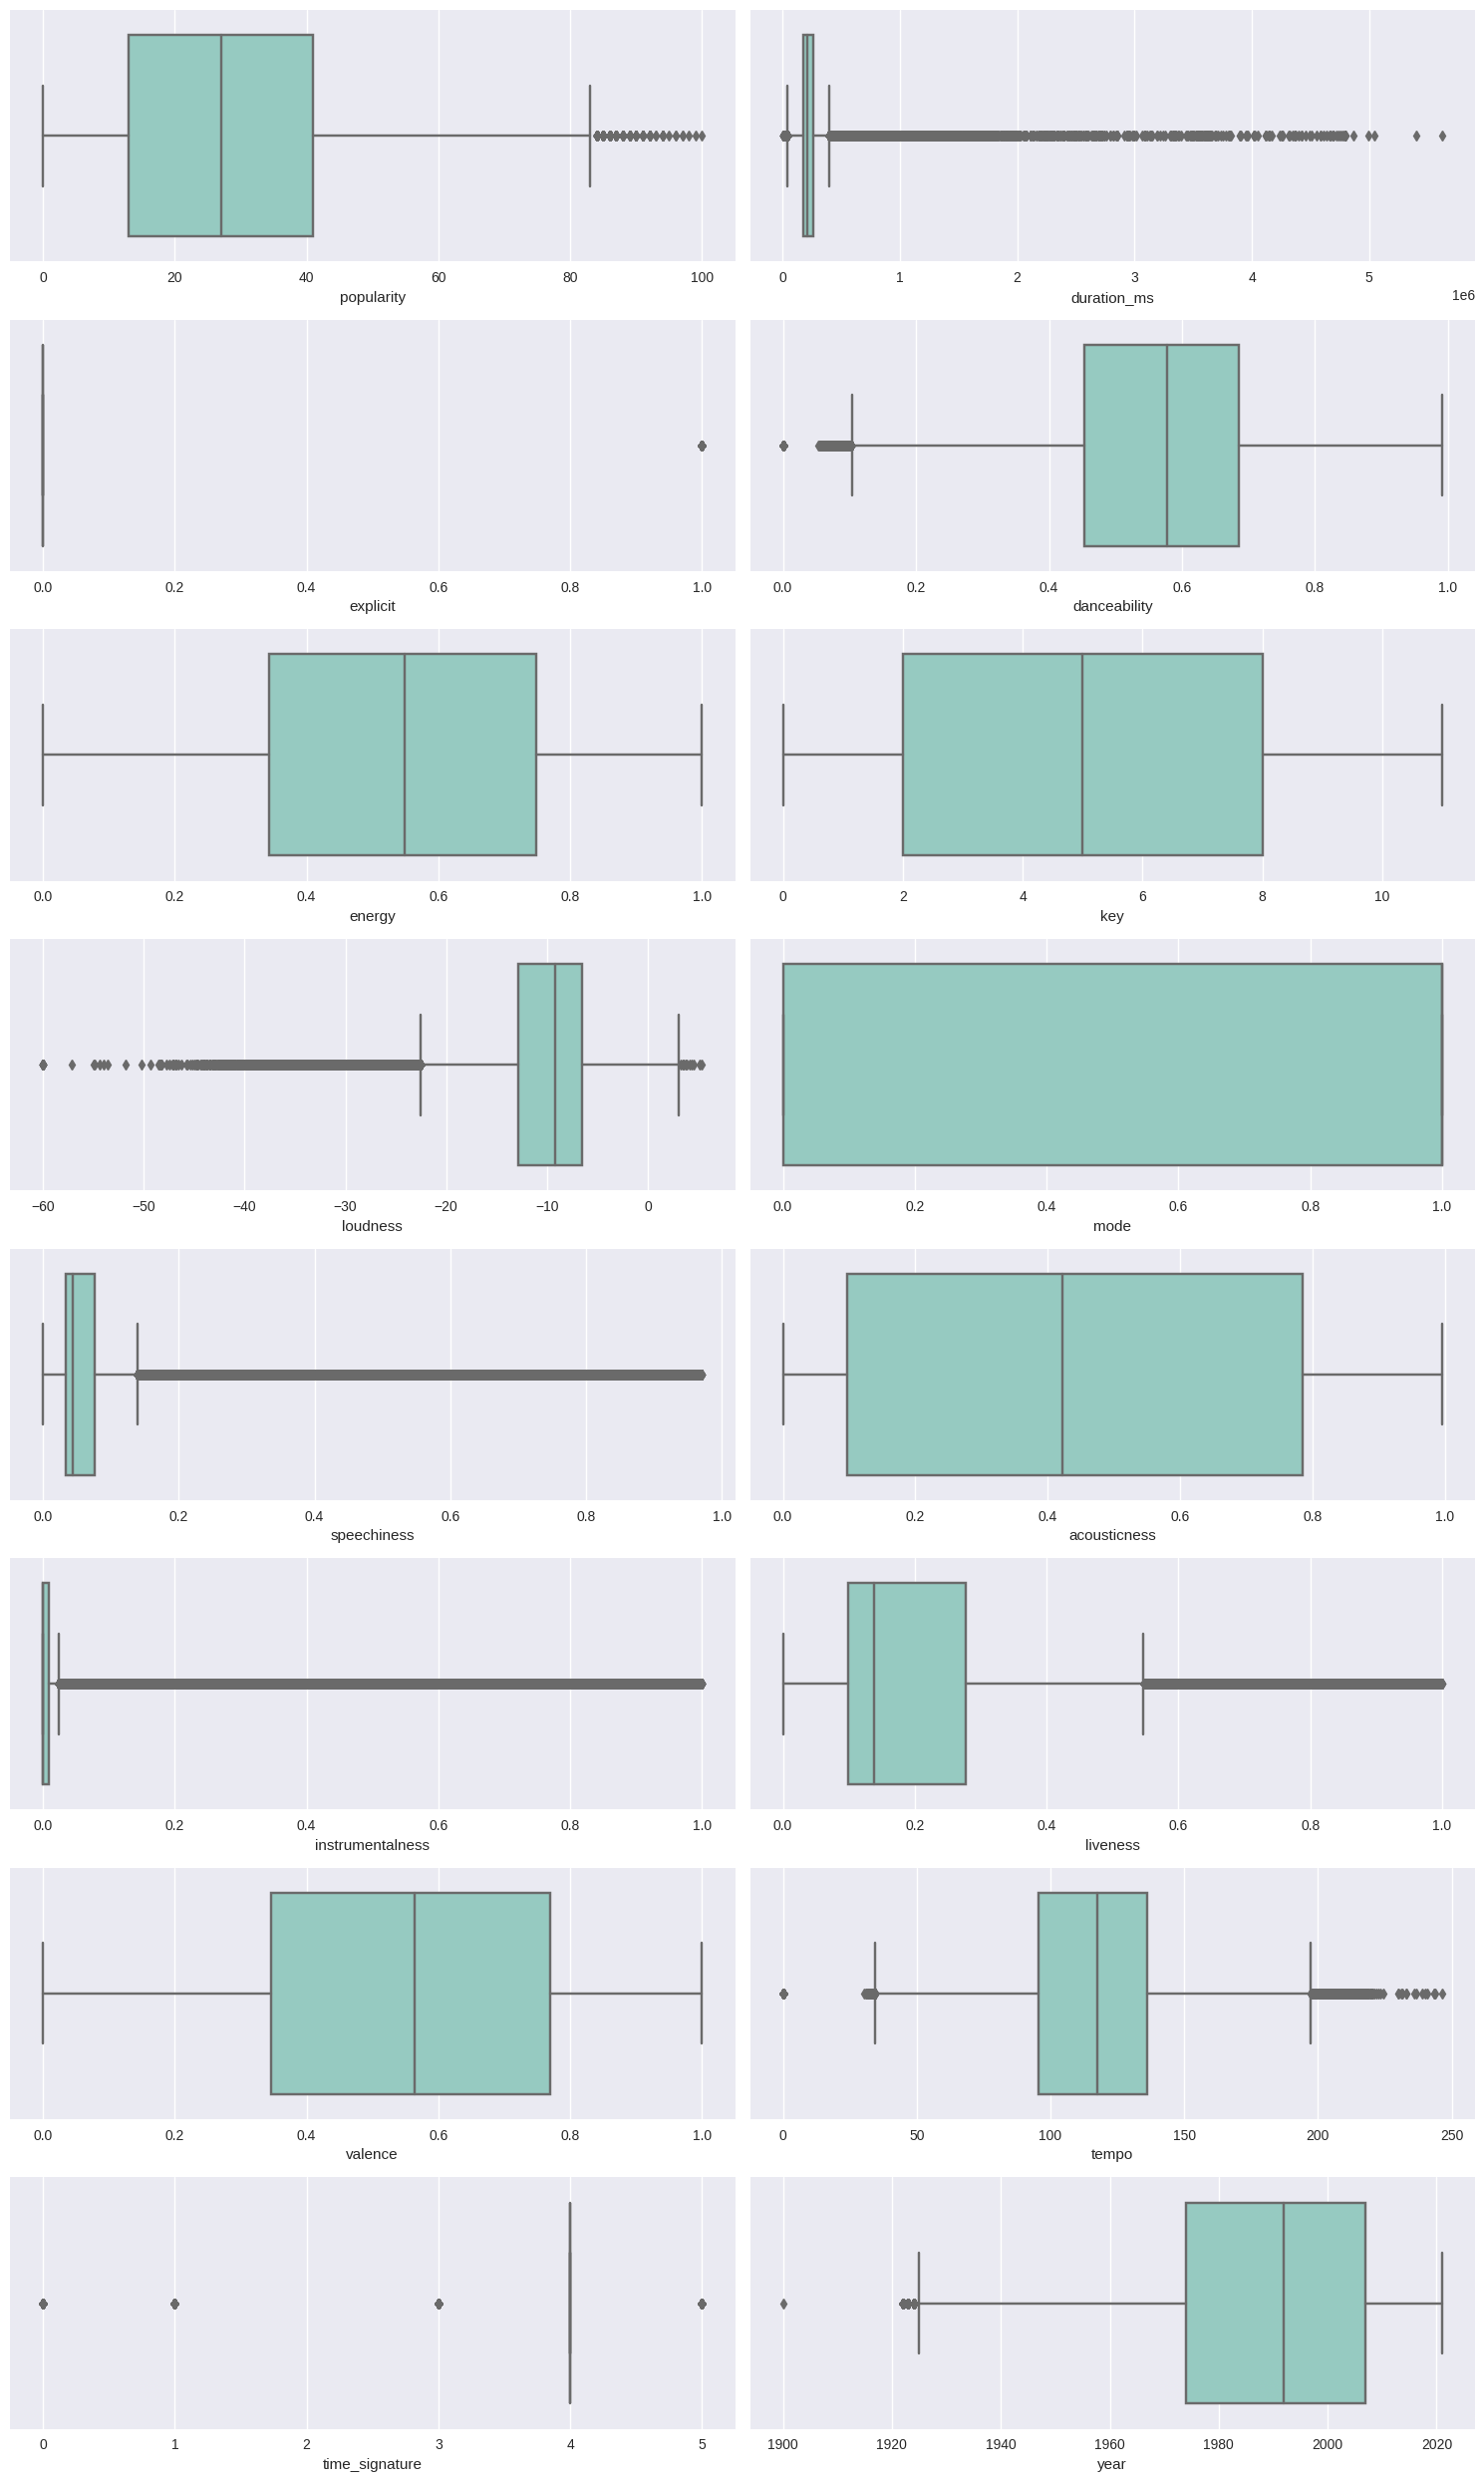

In [ ]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

<a id = '5.4'></a>
## Outliers

* From the boxplots of variables, we can see that there are several features that have a lot of outliers. They are duration_ms, loudness, speechiness, instrumentalness, liveness and tempo.

* We can deal with them by using IQR Ranges to trim outliers.

* Or we can use Robust Scaler to deal with them.

<a id = '5.5'></a>
## Bivariate Analysis

### Linear Correlation

<ipython-input-34-233b8da367c9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



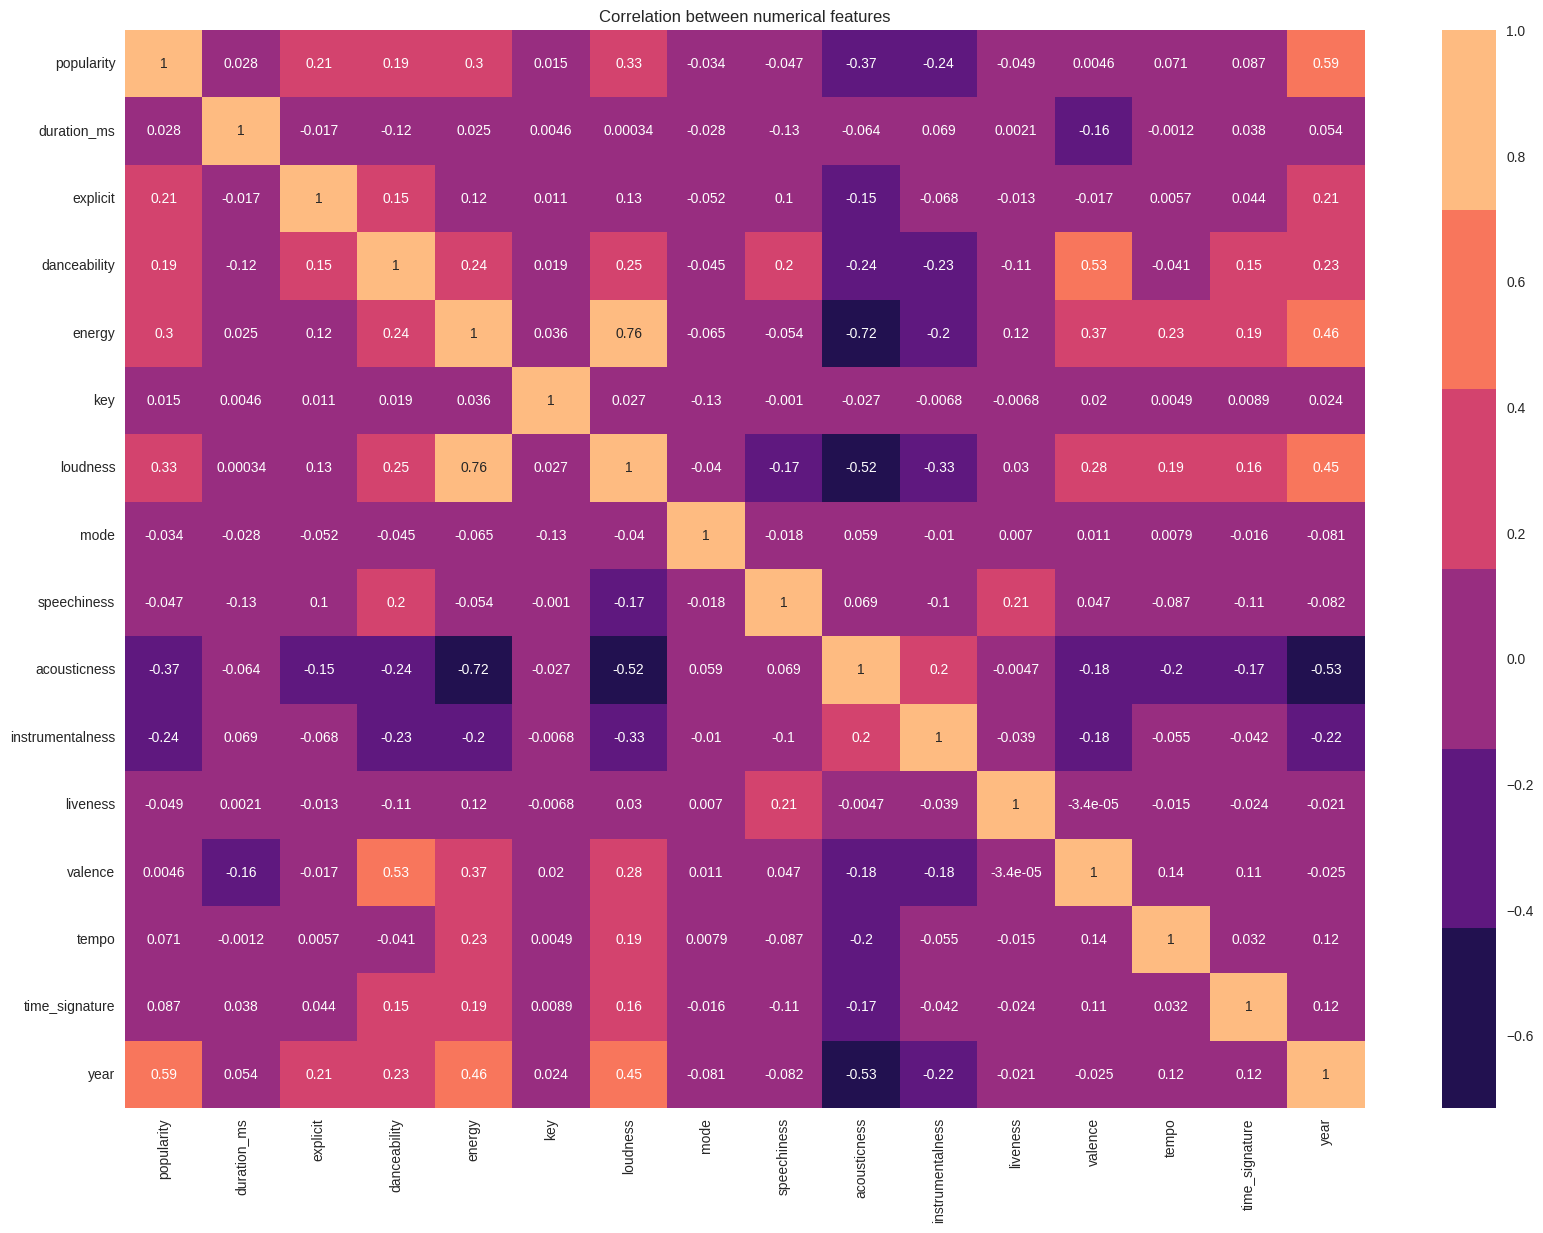

In [ ]:
plt.figure(figsize = (20, 14))

corr_matrix = df.corr()
cmap = sns.color_palette('magma')
sns.heatmap(corr_matrix, annot = True, cmap = cmap)
plt.title('Correlation between numerical features')
plt.show()

From the correlation matrix, we can see that:

* Energy and loudness have a high positive correlation with a score of 0.76.
* Energy and acousticness have a high negative correlation with a score of -0.72.
* The rest variables have acceptable correlation and we can use them to train the machine learning models.



In [ ]:
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.590921
loudness            0.327028
energy              0.302315
explicit            0.211758
danceability        0.187000
time_signature      0.086759
tempo               0.071364
duration_ms         0.027681
key                 0.015299
valence             0.004643
mode               -0.033655
speechiness        -0.047357
liveness           -0.048740
instrumentalness   -0.236487
acousticness       -0.370882
Name: popularity, dtype: float64

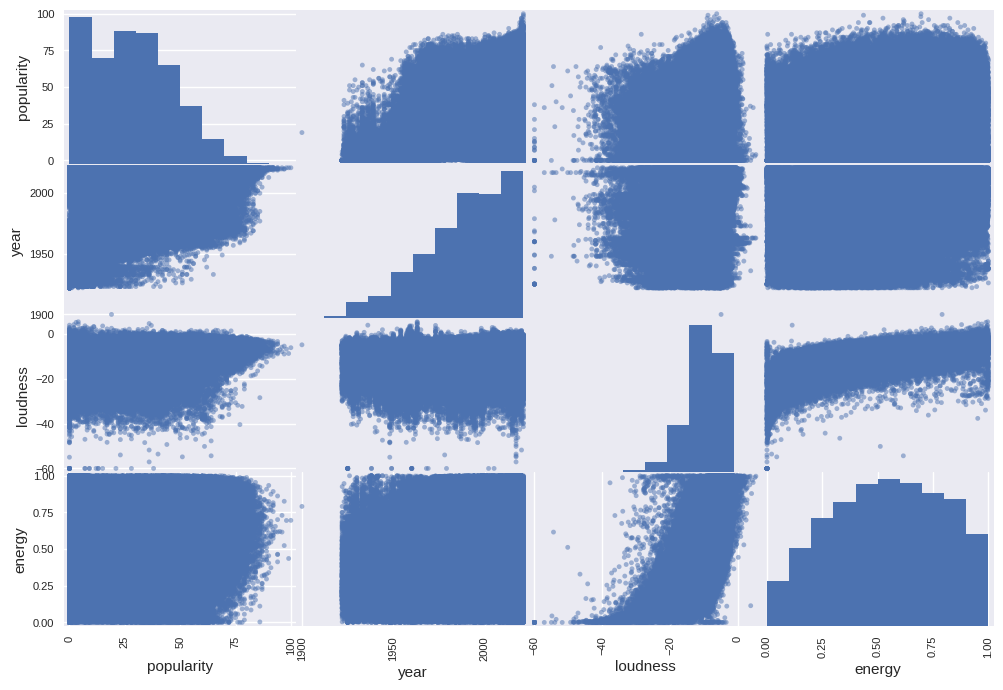

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["popularity", "year", "loudness", "energy"]

scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()

* Tracks that are louder tend to have higher popularity.

* Tracks created in recent years tend to have higher popularity

<a id="6"></a>
# Feature Selection

<a id = '6.1'></a>
## New Features

* Create a new features called 'highly_popular', with threshold = 50. Songs with popularity over 50 is highly popular.

In [ ]:
df["highly_popular"] = pd.cut(df["popularity"],
                               bins=[0, 49, 100],
                               labels=[0, 1],
                            include_lowest=True)

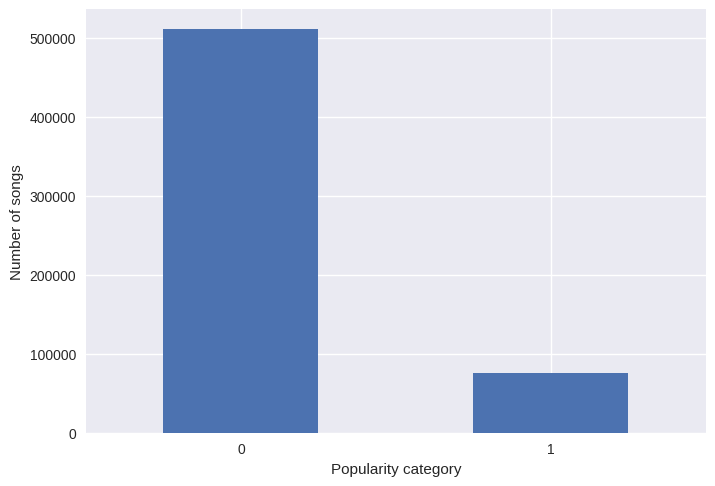

In [ ]:
df["highly_popular"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.show()

In [ ]:
df['highly_popular'].value_counts()

0    510829
1     75843
Name: highly_popular, dtype: int64

In [ ]:
df = df.drop(labels = ['popularity'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   duration_ms       586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  datetime64[ns]
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 non-null  float64       
 14  inst

<a id = '6.2'></a>
## Data Split

### Split the target variable

In [ ]:
np.random.seed(42)

In [ ]:
X = df.copy()
y = df.pop("highly_popular")

<a id = '6.3'></a>
## Resampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# rus = RandomUnderSampler()

# X_rus, y_rus = rus.fit_resample(X, y)

# print(Counter(y_rus))

In [ ]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)

print(Counter(y_ros))

Counter({0: 510829, 1: 510829})


In [ ]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size = 0.8, test_size = 0.2, random_state = 0)

<a id="7"></a>
# Pipeline Building

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config

set_config(display='diagram')

In [ ]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [ ]:
def column_ratio(X):
    return X[:, [0]] / (1000*60)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        RobustScaler())

In [ ]:
num_attribs = ['explicit', 'danceability', 'energy', 'key', 'loudness',
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

cat_attribs = []

# log_attribs = ['duration_ms']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             RobustScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             RobustScaler())

preprocessing = ColumnTransformer([
#         ("log", log_pipeline, log_attribs),
    ("duration", ratio_pipeline(), ["duration_ms"]),
        ("cat", cat_pipeline, cat_attribs),
        ('num', num_pipeline, num_attribs)],
        remainder='drop')

In [ ]:
preprocessing

ColumnTransformer(transformers=[('duration',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                      func=<function column_ratio at 0x7e771d4c7640>)),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['duration_ms']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  Simp...egy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 []),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['explicit', 'danceability', 'energy', 'key',
                                  'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo',
                                  'time_signature'])])

<a id = '8'></a>
# Model Building

<a id="8.1"></a>
## Create a printing results function

In [ ]:
def print_score(classifier, X_train, y_train, X_test, y_test):

    # Training set

    print('\n\n')

    print("TRAINING RESULTS:\n")

    # Predict
    y_train_pred = classifier.predict(X_train)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_train, y_train_pred, digits = 4)}\n')

    print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}\n')

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title("train")
    ax[1].set_title("test")

    print(sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="g", annot_kws={"size": 16}, ax=ax[0]))

    print('\n\n')

    # Test set

    print("TEST RESULTS:\n")

    # Predict
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

    print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')

    print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g", annot_kws={"size": 16}, ax=ax[1]))

    print('\n\n')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.exceptions import ConvergenceWarning

<a id = '8.2'></a>
## Logistic Regression

* Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

* Regularization (penalty) can sometimes be helpful.

* The C parameter controls the penality strength, which can also be effective.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression', LogisticRegression())])

In [ ]:
classifier.named_steps["logistic_regression"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7041    0.6698    0.6865    408879
           1     0.6848    0.7182    0.7011    408447

    accuracy                         0.6940    817326
   macro avg     0.6945    0.6940    0.6938    817326
weighted avg     0.6945    0.6940    0.6938    817326


ROC AUC Score: 0.6940222769225287

Confusion Matrix:
[[273879 135000]
 [115094 293353]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7016    0.6679    0.6843    101950
           1     0.6844    0.7171    0.7003    102382

    accuracy                         0.6925    204332
   macro avg     0.6930    0.6925    0.6923    204332
weighted avg     0.6929    0.6925    0.6923    204332


ROC AUC Score: 0.6924826550162668

Confusion Matrix:
[[68089 33861]
 [28964 73418]]

Axes(0.547727,0.11;0.281818x0.77)





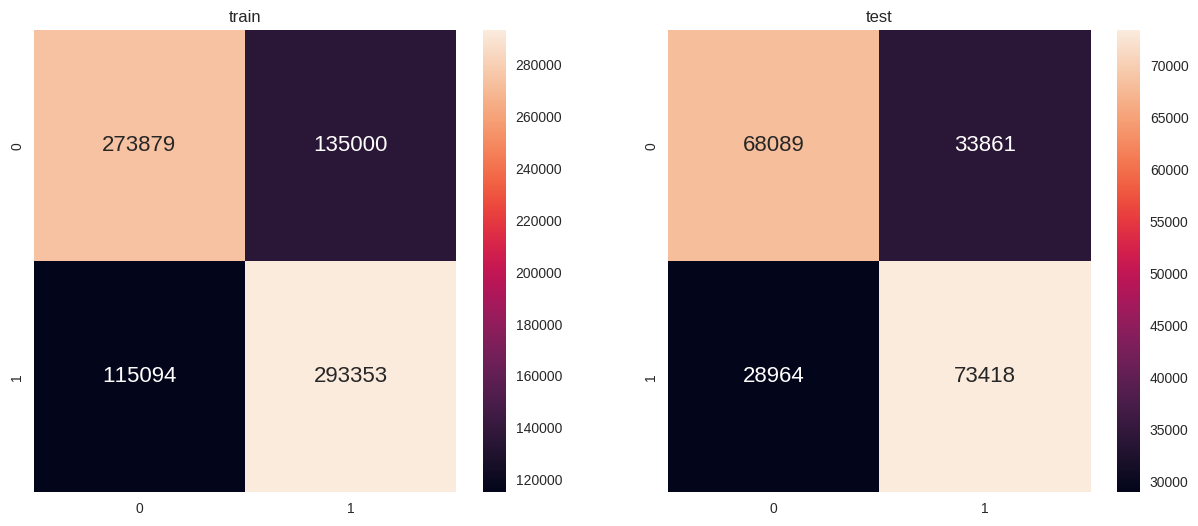

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
# full_pipeline = Pipeline([
#     ("preprocessing", preprocessing),
#     ("logistic_regression", LogisticRegression()),
# ])

# logistic_param = [
#     {
#         'logistic_regression__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
#         'logistic_regression__penalty': ['l1','l2'],
#         'logistic_regression__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#         'logistic_regression__max_iter' : [1000],
#     }
# ]

In [ ]:
# grid_search = GridSearchCV(full_pipeline, logistic_param, cv = 5, scoring='accuracy', n_jobs = -1)

# grid_search.fit(X_train, y_train)

In [ ]:
# print("Tuned Hyperparameters :\n", grid_search.best_params_)
# print('\n')
# print("Accuracy:\n",grid_search.best_score_)

In [ ]:
# cv_res = pd.DataFrame(grid_search.cv_results_)

# cv_res.sort_values(by="mean_test_score", ascending = False, inplace=True)

# cv_res.head()

In [ ]:
# C = grid_search.best_params_['logistic_regression__C']
# penalty = grid_search.best_params_['logistic_regression__penalty']
# solver = grid_search.best_params_['logistic_regression__solver']
# max_iter = grid_search.best_params_['logistic_regression__max_iter']

# classifier = make_pipeline(preprocessing, LogisticRegression(C=C, penalty = penalty, solver = solver, max_iter = max_iter))

# classifier.fit(X_train,y_train)

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression(C=100, penalty = 'l2', solver = 'lbfgs', max_iter = 1000)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression',
                 LogisticRegression(C=100, max_iter=1000))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7035    0.6703    0.6865    408879
           1     0.6848    0.7171    0.7006    408447

    accuracy                         0.6937    817326
   macro avg     0.6941    0.6937    0.6935    817326
weighted avg     0.6942    0.6937    0.6935    817326


ROC AUC Score: 0.6937245435664325

Confusion Matrix:
[[274084 134795]
 [115542 292905]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7011    0.6688    0.6846    101950
           1     0.6847    0.7161    0.7000    102382

    accuracy                         0.6925    204332
   macro avg     0.6929    0.6924    0.6923    204332
weighted avg     0.6929    0.6925    0.6923    204332


ROC AUC Score: 0.6924357842297503

Confusion Matrix:
[[68184 33766]
 [29069 73313]]

Axes(0.547727,0.11;0.281818x0.77)





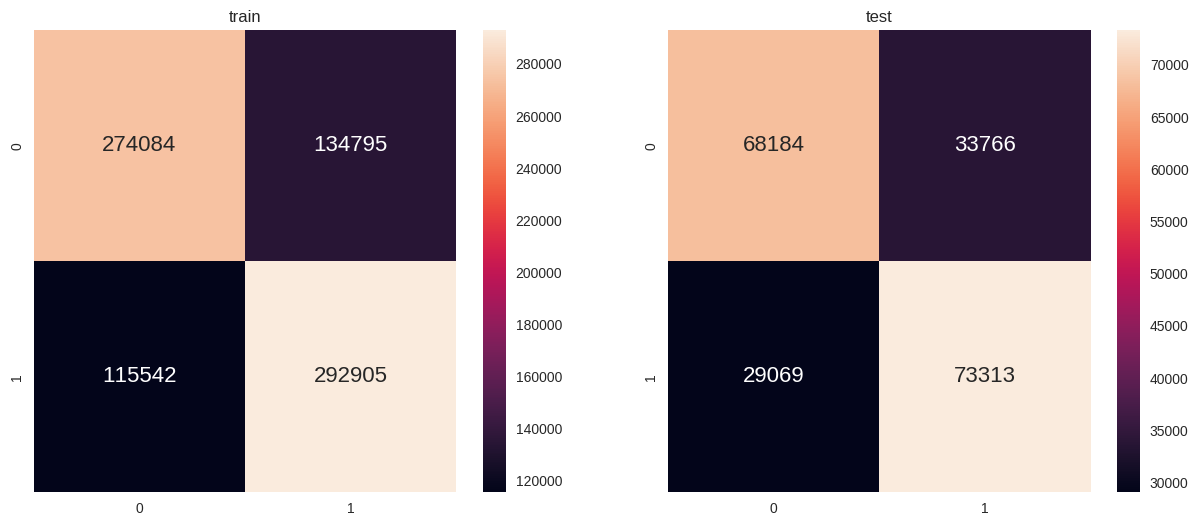

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
feature_names = ['duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': classifier.named_steps["logistic_regression"].coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

importances

,Attribute,Importance
1,explicit,1.398749
5,loudness,0.750565
2,danceability,0.546726
12,tempo,0.083473
6,mode,0.017390
4,key,0.014408
13,time_signature,0.007028
9,instrumentalness,-0.001352
0,duration,-0.020778
7,speechiness,-0.077096


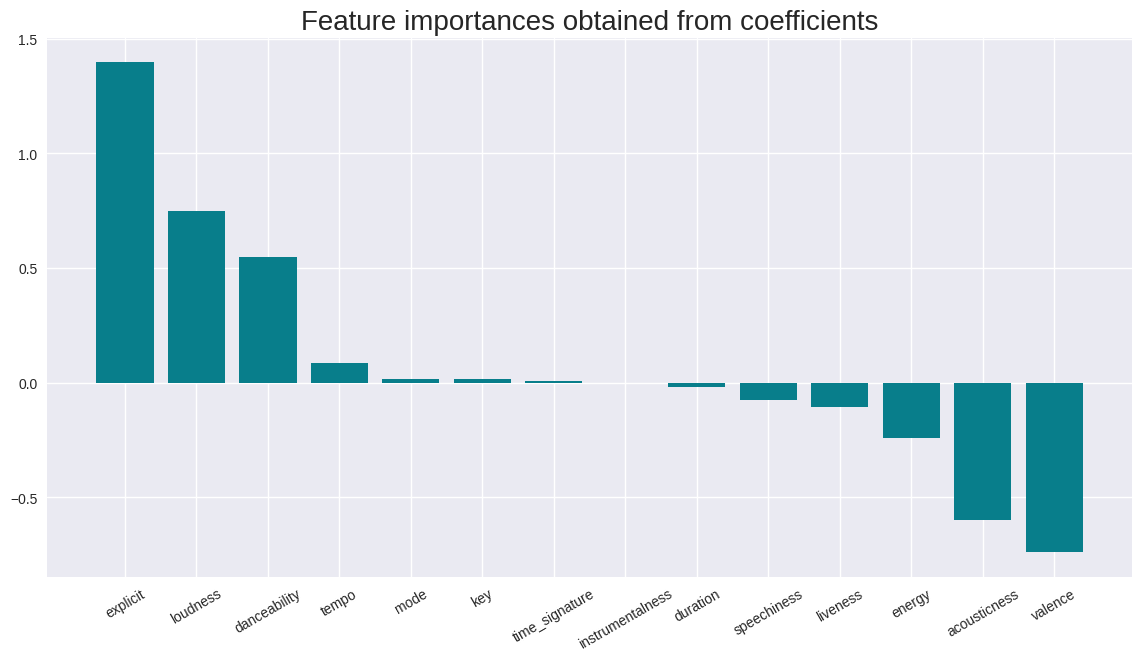

In [ ]:
plt.figure(figsize = (14, 7))

plt.bar(x=importances['Attribute'], height = importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=30)
plt.show()

<a id = '8.3'></a>
## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [ ]:
classifier.named_steps["random_forest"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9928    0.9962    408879
           1     0.9928    0.9997    0.9962    408447

    accuracy                         0.9962    817326
   macro avg     0.9963    0.9962    0.9962    817326
weighted avg     0.9963    0.9962    0.9962    817326


ROC AUC Score: 0.9962371049914285

Confusion Matrix:
[[405932   2947]
 [   130 408317]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9972    0.9553    0.9758    101950
           1     0.9573    0.9973    0.9769    102382

    accuracy                         0.9764    204332
   macro avg     0.9772    0.9763    0.9763    204332
weighted avg     0.9772    0.9764    0.9763    204332


ROC AUC Score: 0.9763077376250341

Confusion Matrix:
[[ 97390   4560]
 [   272 102110]]

Axes(0.547727,0.11;0.281818x0.77)





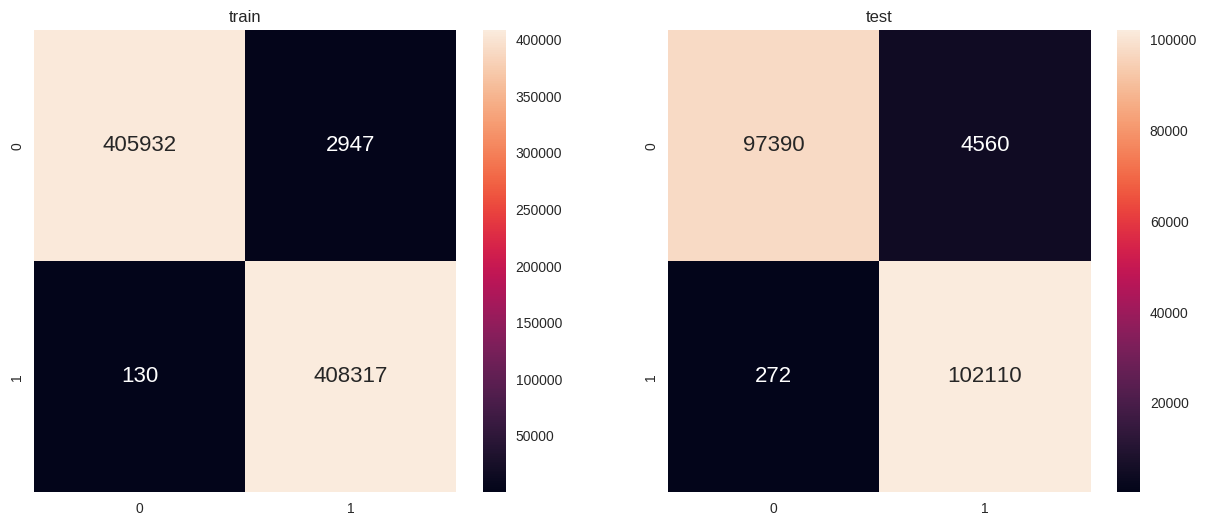

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

n_estimators: Number of trees in random forest

max_features: Number of features to consider at every split

max_depth: Maximum number of levels in tree

min_samples_split: Minimum number of samples required to split a node

min_samples_leaf: Minimum number of samples required at each leaf node

bootstrap: Method of selecting samples for training each tree

In [ ]:
# full_pipeline = Pipeline([
#     ("preprocessing", preprocessing),
#     ("random_forest", RandomForestClassifier(random_state=42)),
# ])

# forest_param = [
#     {
#         'random_forest__n_estimators': [100, 300],
#         'random_forest__max_features': ['sqrt', 'log2'],
#         'random_forest__max_depth' : [10, 50],
#         'random_forest__min_samples_leaf': [3, 5],
#         'random_forest__min_samples_split': [2, 5],
#         'random_forest__criterion' :['gini', 'entropy'],
#         'random_forest__bootstrap':[True],
#     }
# ]

In [ ]:
# grid_search = RandomizedSearchCV(full_pipeline, forest_param, cv = 5, scoring='accuracy', n_jobs = -1)

# grid_search.fit(X_train, y_train)

In [ ]:
# print("Tuned Hyperparameters :\n", grid_search.best_params_)
# print('\n')
# print("Accuracy:\n",grid_search.best_score_)

In [ ]:
# cv_res = pd.DataFrame(grid_search.cv_results_)

# cv_res.sort_values(by="mean_test_score", ascending = False, inplace=True)

# cv_res.head()

In [ ]:
# n_estimators = grid_search.best_params_['random_forest__n_estimators']
# max_features = grid_search.best_params_['random_forest__max_features']
# max_depth = grid_search.best_params_['random_forest__max_depth']
# min_samples_leaf = grid_search.best_params_['random_forest__min_samples_leaf']
# min_samples_split = grid_search.best_params_['random_forest__min_samples_split']
# criterion = grid_search.best_params_['random_forest__criterion']
# bootstrap = grid_search.best_params_['random_forest__bootstrap']

# classifier = Pipeline([
#     ("preprocessing", preprocessing),
#     ("random_forest", RandomForestClassifier(n_estimators = n_estimators,
#                                             max_features = max_features,
#                                             max_depth = max_depth,
#                                             min_samples_leaf = min_samples_leaf,
#                                             min_samples_split = min_samples_split,
#                                             criterion = criterion,
#                                             bootstrap = bootstrap))
# ])

# classifier.fit(X_train,y_train)

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(n_estimators = 300,
                                            max_features = 'sqrt',
                                            max_depth = 50,
                                            min_samples_leaf = 3,
                                            min_samples_split = 2,
                                            criterion = 'entropy',
                                            bootstrap = True,
                                            random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        min_samples_leaf=3, n_estimators=300,
                                        random_state=42))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9985    0.9898    0.9941    408879
           1     0.9899    0.9985    0.9942    408447

    accuracy                         0.9942    817326
   macro avg     0.9942    0.9942    0.9942    817326
weighted avg     0.9942    0.9942    0.9942    817326


ROC AUC Score: 0.9941551954777289

Confusion Matrix:
[[404701   4178]
 [   601 407846]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9908    0.9359    0.9626    101950
           1     0.9395    0.9914    0.9648    102382

    accuracy                         0.9637    204332
   macro avg     0.9652    0.9636    0.9637    204332
weighted avg     0.9651    0.9637    0.9637    204332


ROC AUC Score: 0.9636425776934088

Confusion Matrix:
[[ 95415   6535]
 [   882 101500]]

Axes(0.547727,0.11;0.281818x0.77)





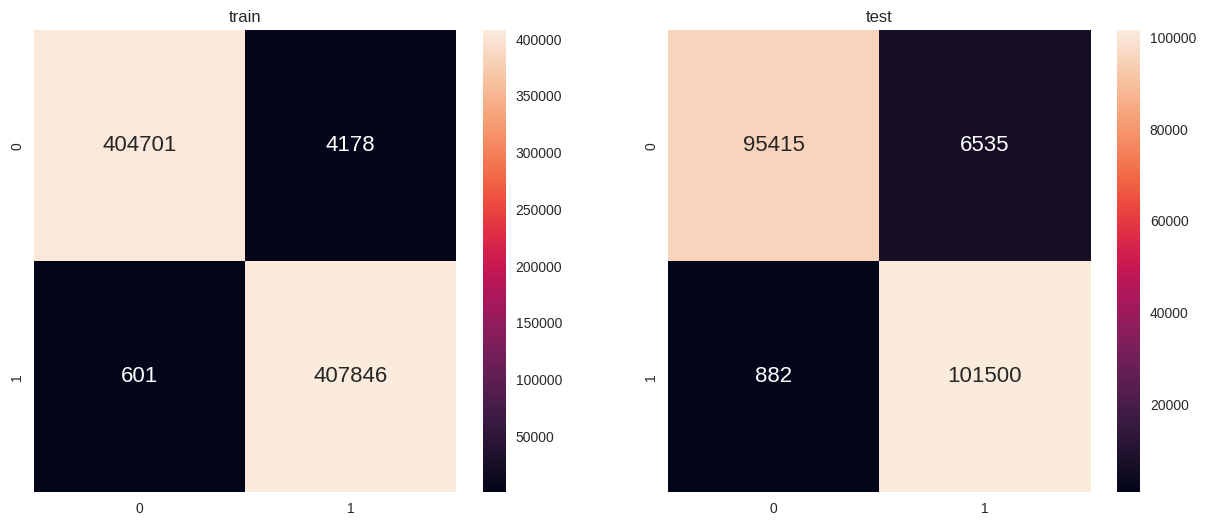

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
classifier.named_steps["random_forest"].feature_importances_

array([0.09405971, 0.0283458 , 0.08692971, 0.08794304, 0.04012049,
       0.13894972, 0.00960048, 0.08891875, 0.11065843, 0.06111605,
       0.07906675, 0.0903138 , 0.07815532, 0.00582193])

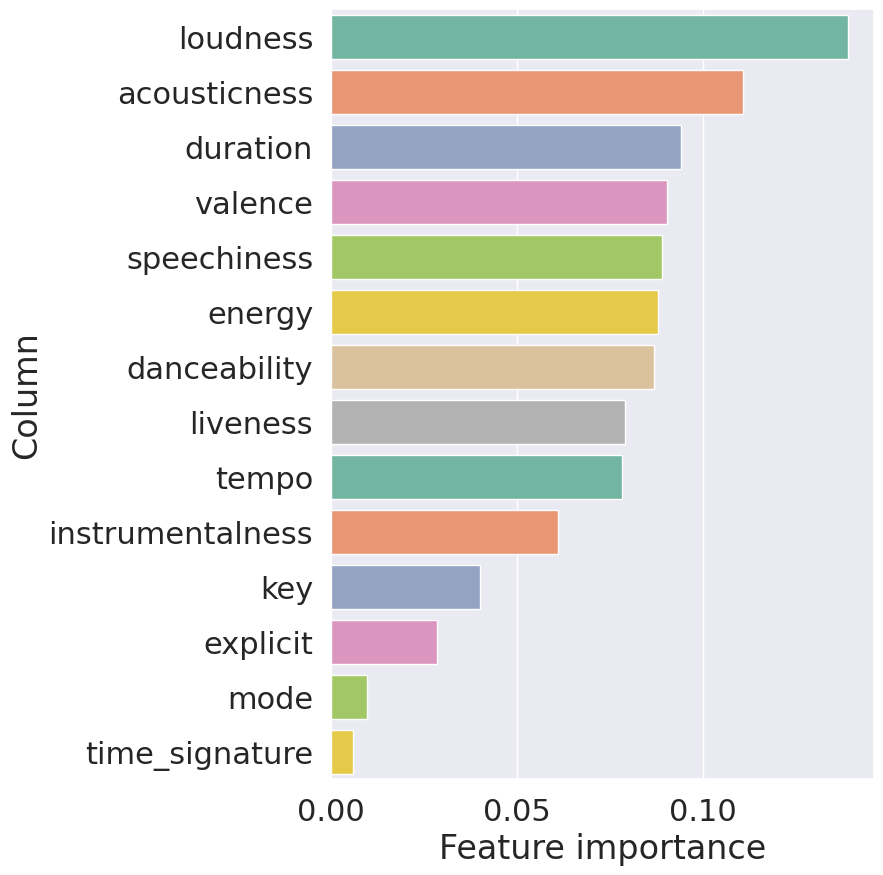

In [ ]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["random_forest"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

<a id = '8.4'></a>
## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
classifier.named_steps["xgboost"].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7632    0.7215    0.7418    408879
           1     0.7357    0.7759    0.7553    408447

    accuracy                         0.7487    817326
   macro avg     0.7494    0.7487    0.7485    817326
weighted avg     0.7494    0.7487    0.7485    817326


ROC AUC Score: 0.7487082799533988

Confusion Matrix:
[[295016 113863]
 [ 91536 316911]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7526    0.7116    0.7315    101950
           1     0.7276    0.7671    0.7468    102382

    accuracy                         0.7394    204332
   macro avg     0.7401    0.7394    0.7392    204332
weighted avg     0.7401    0.7394    0.7392    204332


ROC AUC Score: 0.7393506882824059

Confusion Matrix:
[[72546 29404]
 [23843 78539]]

Axes(0.547727,0.11;0.281818x0.77)





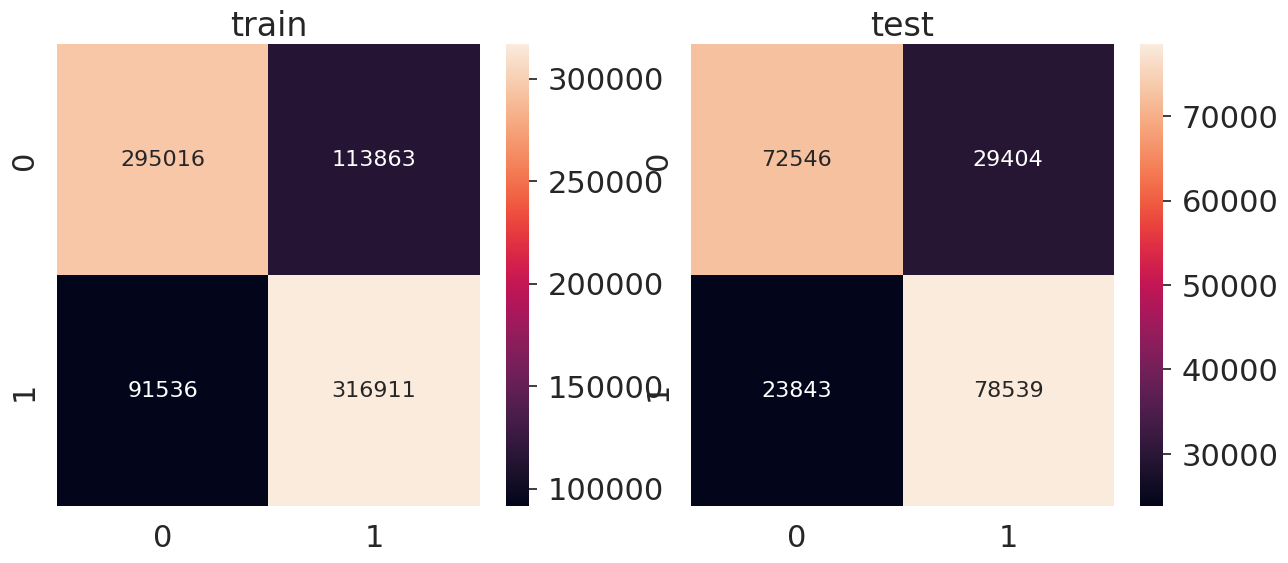

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

n_estimators: Number of trees in random forest

max_features: Number of features to consider at every split

max_depth: Maximum number of levels in tree

min_samples_split: Minimum number of samples required to split a node

min_samples_leaf: Minimum number of samples required at each leaf node

bootstrap: Method of selecting samples for training each tree

In [ ]:
# full_pipeline = Pipeline([
#     ("preprocessing", preprocessing),
#     ("xgboost", XGBClassifier()),
# ])

# forest_param = [
#     {
#         'xgboost__n_estimators': [100, 200],
#         'xgboost__gamma': [0, 0.5],
#         'xgboost__max_depth' : [6, 12],
#         'xgboost__learning_rate': [0.1, 0.3],
#         'xgboost__min_child_weight': [1, 5],
#         'xgboost__subsample': [0.5, 1],
#         'xgboost__colsample_bytree': [0.5, 1],
#         'xgboost__objective' : ['binary:logistic'],
#         'xgboost__random_state': 42,
#     }
# ]

In [ ]:
# grid_search = RandomizedSearchCV(full_pipeline, forest_param, cv = 5, scoring='accuracy', n_jobs = -1)

# grid_search.fit(X_train, y_train)

In [ ]:
# print("Tuned Hyperparameters :\n", grid_search.best_params_)
# print('\n')
# print("Accuracy:\n",grid_search.best_score_)

In [ ]:
# cv_res = pd.DataFrame(grid_search.cv_results_)

# cv_res.sort_values(by="mean_test_score", ascending = False, inplace=True)

# cv_res.head()

In [ ]:
# n_estimators = grid_search.best_params_['xgboost__n_estimators']
# gamma = grid_search.best_params_['xgboost__gamma']
# max_depth = grid_search.best_params_['xgboost__max_depth']
# learning_rate = grid_search.best_params_['xgboost__learning_rate']
# min_child_weight = grid_search.best_params_['xgboost__min_child_weight']
# subsample = grid_search.best_params_['xgboost__subsample']
# colsample_bytree = grid_search.best_params_['xgboost__colsample_bytree']
# objective = grid_search.best_params_['xgboost__objective']
# random_state = grid_search.best_params_['xgboost__random_state']

# classifier = Pipeline([
#     ("preprocessing", preprocessing),
#     ("xgboost", XGBClassifier(n_estimators = n_estimators,
#                             gamma = gamma,
#                             max_depth = max_depth,
#                             learning_rate = learning_rate,
#                             min_child_weight = min_child_weight,
#                             subsample = subsample,
#                             colsample_bytree = colsample_bytree,
#                             objective = objective,
#                               random_state = random_state)),
# ])

# classifier.fit(X_train,y_train)

In [ ]:
# print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier(n_estimators = 100,
                            gamma = 0.5,
                            max_depth = 6,
                            learning_rate = 0.1,
                            min_child_weight = 1,
                            subsample = 1,
                            colsample_bytree = 1,
                            objective = 'binary:logistic',
                              random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e771d4c51b0>,
                                                                                       func=<function column_ratio at 0x7e771d4c7640>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7403    0.7044    0.7219    408879
           1     0.7178    0.7527    0.7348    408447

    accuracy                         0.7285    817326
   macro avg     0.7291    0.7285    0.7284    817326
weighted avg     0.7291    0.7285    0.7284    817326


ROC AUC Score: 0.7285237827480895

Confusion Matrix:
[[288007 120872]
 [101023 307424]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7349    0.6992    0.7166    101950
           1     0.7143    0.7488    0.7312    102382

    accuracy                         0.7241    204332
   macro avg     0.7246    0.7240    0.7239    204332
weighted avg     0.7246    0.7241    0.7239    204332


ROC AUC Score: 0.7240289978825035

Confusion Matrix:
[[71288 30662]
 [25717 76665]]

Axes(0.547727,0.11;0.281818x0.77)





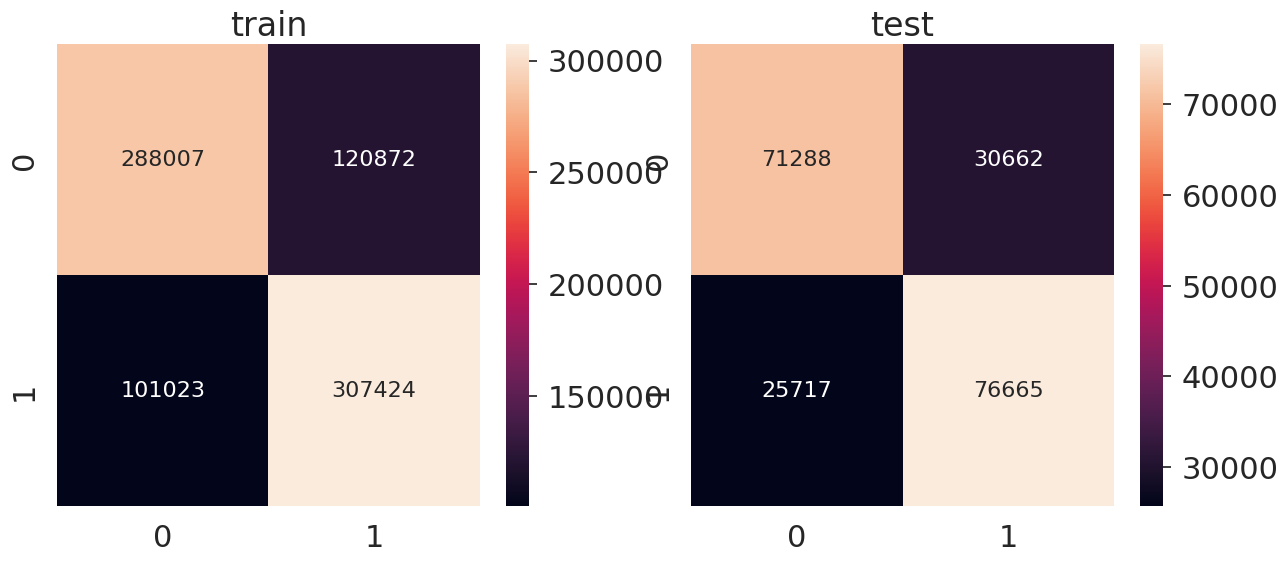

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

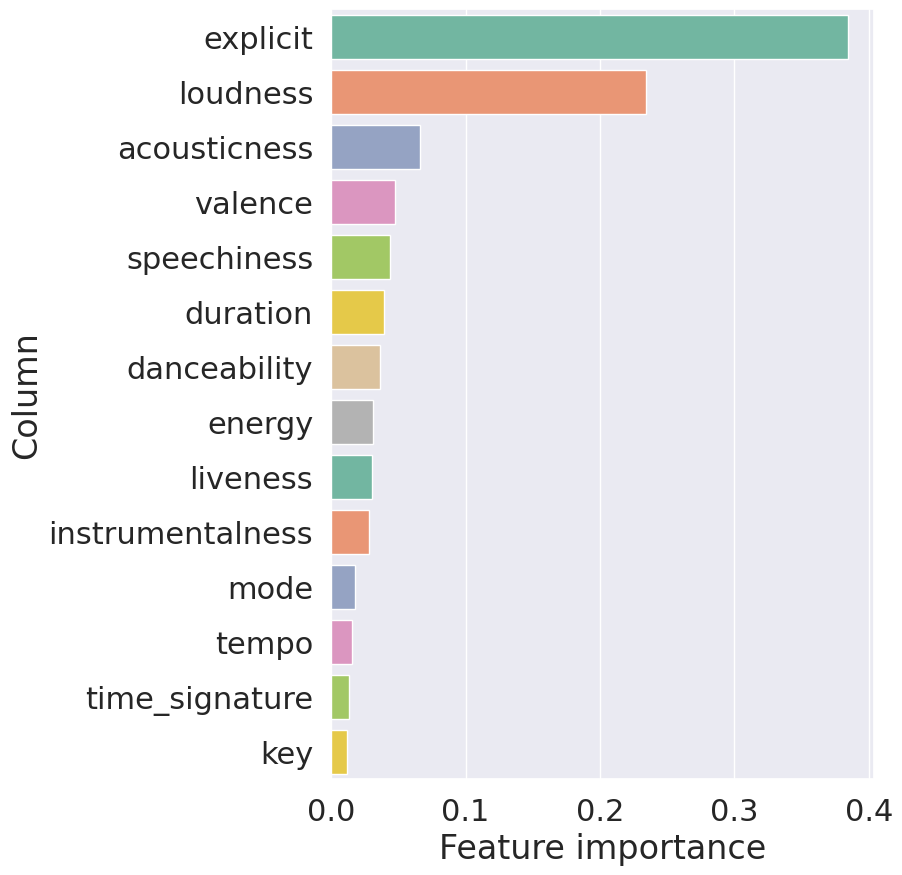

In [ ]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["xgboost"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');